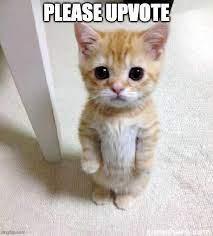


**Please Upvote** 🙏🙏🙏🙏🙏


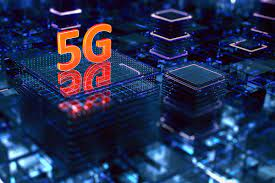

Welcome to the "5G Resource Allocation Dataset" – your gateway to understanding and optimizing the next-generation of wireless networks! 🌐📱

This dataset provides a comprehensive look into the world of 5G resource allocation, where cutting-edge AI algorithms are harnessed to dynamically manage network resources such as bandwidth, frequency spectrum, and computing power in real-time. 🤖⚙️

Explore a wealth of data encompassing various aspects of 5G resource allocation, including:

**Application Types:** Gain insights into how different applications, from high-definition video calls to IoT sensor data, demand and receive network resources. 📹📡

**Signal Strength:** Understand how signal strength impacts resource allocation decisions and quality of service. 📶🔍

**Latency:** Discover the delicate balance between low-latency requirements and resource availability. ⏱️📈

**Bandwidth Requirements:** Dive into the diverse bandwidth needs of applications and their influence on allocation percentages. 🌐💼

**Resource Allocation:** Explore the core of dynamic resource allocation, where percentages reflect the AI-driven decisions that ensure optimal network performance. 📊💻



# 1. Importing the necessary libraries


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5g-quality-of-service/Quality of Service 5G.csv


#### 1. Importing the necessary libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### 2.  Read the data using pandas 

In [3]:
data = pd.read_csv('/kaggle/input/5g-quality-of-service/Quality of Service 5G.csv')

#### 3. Data Summary

In [4]:
data

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


In [5]:
data.head(10)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
5,9/3/2023 10:00,User_6,Background_Download,-90 dBm,50 ms,500 Kbps,550 Kbps,70%
6,9/3/2023 10:00,User_7,Web_Browsing,-88 dBm,30 ms,1 Mbps,1 Mbps,60%
7,9/3/2023 10:00,User_8,IoT_Temperature,-95 dBm,100 ms,10 Kbps,15 Kbps,50%
8,9/3/2023 10:00,User_9,Video_Streaming,-82 dBm,35 ms,3 Mbps,3.5 Mbps,80%
9,9/3/2023 10:00,User_10,File_Download,-75 dBm,45 ms,2 Mbps,2 Mbps,70%


#### 4 . Data Cleaning

In [6]:
data.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

<Axes: >

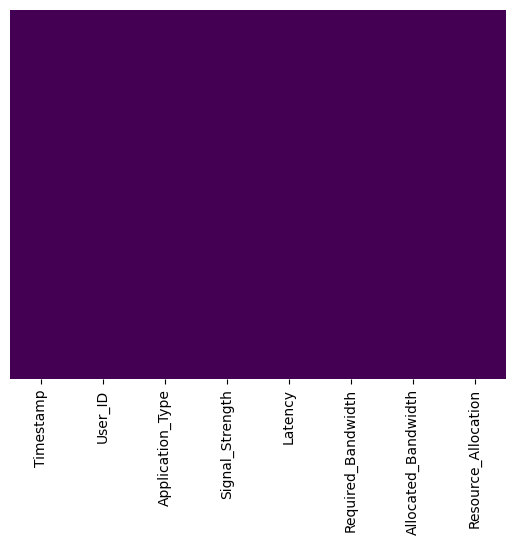

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,
cbar=False,cmap='viridis')

####  5. statistics

In [8]:
data.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [9]:
data.count()

Timestamp              400
User_ID                400
Application_Type       400
Signal_Strength        400
Latency                400
Required_Bandwidth     400
Allocated_Bandwidth    400
Resource_Allocation    400
dtype: int64

In [10]:
data['Latency'].nunique()

87

In [11]:
data['Latency'].unique()

array(['30 ms', '20 ms', '40 ms', '10 ms', '25 ms', '50 ms', '100 ms',
       '35 ms', '45 ms', '32 ms', '24 ms', '28 ms', '22 ms', '29 ms',
       '38 ms', '9 ms', '48 ms', '105 ms', '34 ms', '31 ms', '23 ms',
       '21 ms', '37 ms', '8 ms', '47 ms', '110 ms', '33 ms', '27 ms',
       '36 ms', '7 ms', '46 ms', '26 ms', '104 ms', '103 ms', '102 ms',
       '19 ms', '6 ms', '44 ms', '101 ms', '18 ms', '43 ms', '17 ms',
       '42 ms', '99 ms', '5 ms', '49 ms', '51 ms', '52 ms', '53 ms',
       '54 ms', '55 ms', '56 ms', '39 ms', '16 ms', '57 ms', '15 ms',
       '58 ms', '41 ms', '14 ms', '59 ms', '13 ms', '60 ms', '12 ms',
       '61 ms', '11 ms', '62 ms', '63 ms', '64 ms', '65 ms', '66 ms',
       '67 ms', '68 ms', '4 ms', '69 ms', '3 ms', '70 ms', '2 ms',
       '71 ms', '1 ms', '72 ms', '0 ms', '73 ms', '74 ms', '75 ms',
       '76 ms', '77 ms', '78 ms'], dtype=object)

In [12]:
data['Resource_Allocation'].unique()

array(['70%', '80%', '75%', '90%', '85%', '60%', '50%', '65%', '55%'],
      dtype=object)

In [13]:
data['Application_Type'].unique()


array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [14]:
data['Latency'] = data['Latency'].apply(lambda x: int(x.replace('ms', '')))


In [15]:
label = data['Application_Type']
sizes = data['Resource_Allocation']


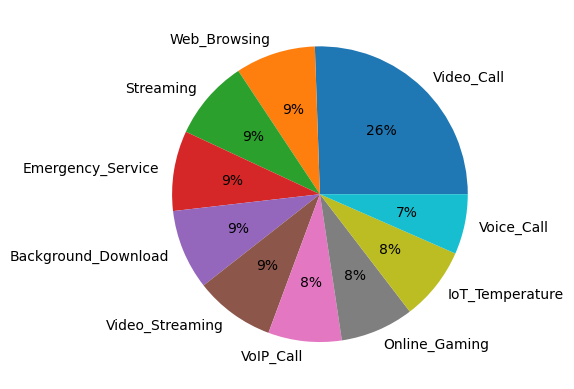

In [16]:
app_name  =data.Application_Type.value_counts().index
lat_val = data.Latency.value_counts().values


#pie chart -Top 10 application using high latency

plt.pie(lat_val[:10],labels = app_name[:10],autopct='%1.f%%');

**Time Series Line Chart:** This is the most common choice for representing data over time. It's a line graph where the x-axis represents time and the y-axis represents the value of the data. Time series line charts are effective for showing trends, patterns, and fluctuations in data over a continuous time period.

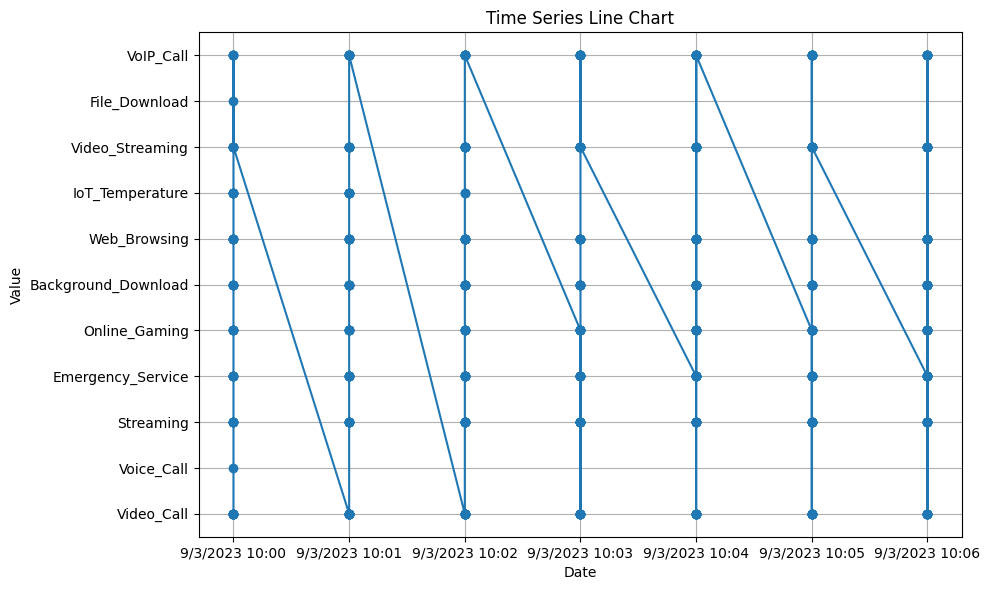

In [17]:
# Create the figure and axis objects
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Application_Type'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Line Chart')

# Show the chart
plt.grid(True)
plt.tight_layout()
plt.show()


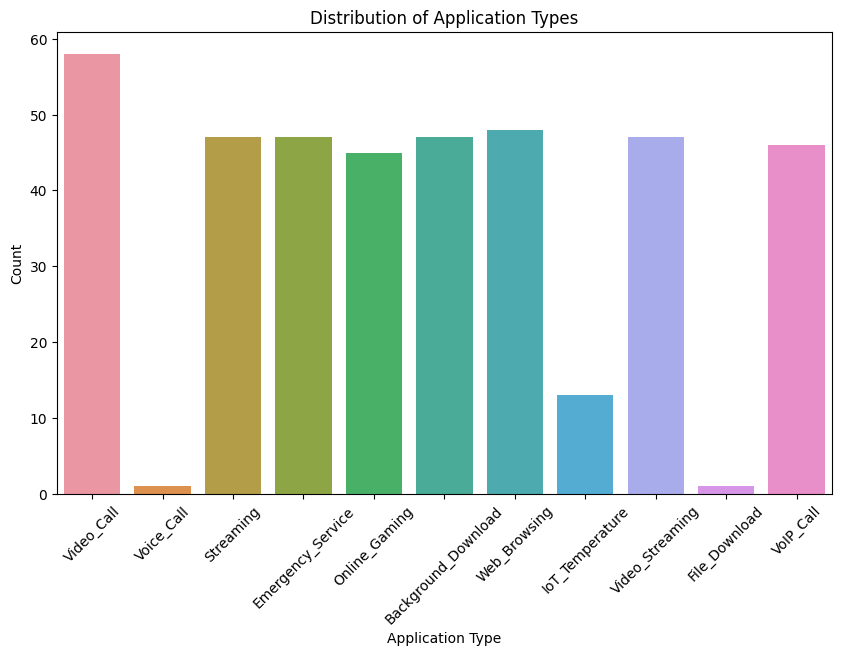

In [18]:
 #Bar plot of Application Types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Application_Type')
plt.title('Distribution of Application Types')
plt.xticks(rotation=45)
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.show()

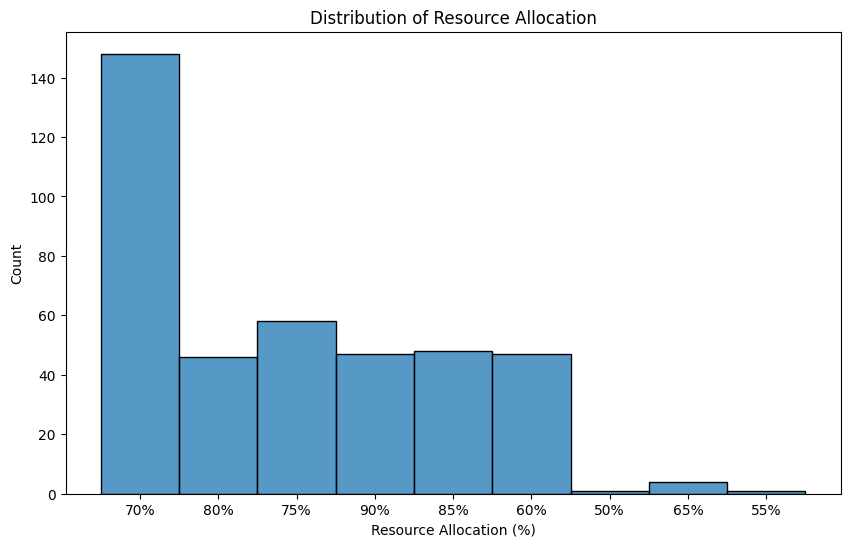

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Resource_Allocation', bins=10)
plt.title('Distribution of Resource Allocation')
plt.xlabel('Resource Allocation (%)')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1200 with 0 Axes>

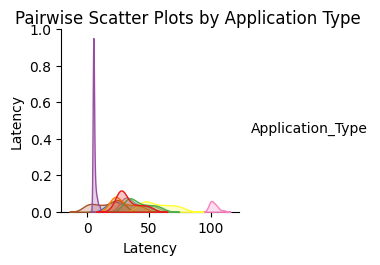

In [20]:
plt.figure(figsize=(20, 12))
sns.pairplot(data=data, hue='Application_Type', palette='Set1')
plt.suptitle('Pairwise Scatter Plots by Application Type', y=1.02)
plt.show()